<a href="https://colab.research.google.com/github/muttu2244/AIMLOPS/blob/main/M6_AST_04_ImageClassification_with_VisionTransformer_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A Program by IISc and TalentSprint
### Assignment 4: Image classification with Vision Transformer

## Learning Objectives

At the end of the experiment, you will be able to:

* understand the vision transformer (ViT) model
* create sequences of image patches to feed to ViT
* perform image classification using ViT

## Problem Statement:
Implementing the Vision Transformer (ViT) model for image classification.

## Introduction

This example implements the [Vision Transformer (ViT)](https://arxiv.org/abs/2010.11929)
model by Alexey Dosovitskiy et al. for image classification,
and demonstrates it on the CIFAR-100 dataset.
The ViT model applies the Transformer architecture with self-attention to sequences of
image patches, without using convolution layers.

## Architecture

<img src='https://drive.google.com/uc?id=1-AtzziPeiWVvApGGd7DlqwoJk1ycbgaB'>

 The ViT employs the encoder part of the original Transformer architecture. The input to the encoder is a sequence of embedded image patches (including a learnable  class embedding prepended to the sequence), which is also augmented with positional information. A classification head attached to the output of the encoder receives the value of the learnable class embedding, to generate a classification output based on its state.

## Data Description

**CIFAR-100** is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.

It has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:

<img src='https://cdn.iisc.talentsprint.com/AIandMLOps/Images/Cifar-100%20dataset.png' width=750px>

[Link](https://keras.io/api/datasets/cifar100/) to keras CIFAR100 small images classification dataset

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2303272" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9900455663" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M6_AST_04_ImageClassification_with_VisionTransformer_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"  # ["tensorflow", "jax", "torch"]

import keras
from keras import layers
from keras import ops

import numpy as np
import matplotlib.pyplot as plt

## Prepare the data

In [5]:
num_classes = 100          # Number of classes
input_shape = (32, 32, 3)  # Input shape of the images

# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Display the train and test images shapes
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


## Configure the hyperparameters

These hyperparameters will be used in model definition

In [6]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 1  # For real training, use num_epochs=100. 10 is a test value
image_size = 72       # We'll resize input images to this size
patch_size = 6        # Size of the patches to be extract from the input images i.e. 6x6
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4

transformer_units = [              # Size of the transformer layers
    projection_dim * 2,
    projection_dim,
]

transformer_layers = 8
mlp_head_units = [2048, 1024]      # Size of the dense layers of the final classifier

## Use data augmentation

It is driven from original data with some minor changes. In the case of image augmentation, geometric and color space transformations such as (flipping, resizing, rotation, zoom) are made to increase the size and diversity of the training set.

In [7]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),                                        # Normalize pixel values between 0 and 1
        layers.Resizing(image_size, image_size),                       # Resize images to the desired size
        layers.RandomFlip("horizontal"),                               # Apply random horizontal flipping
        layers.RandomRotation(factor=0.02),                            # Apply random rotation with a factor of 0.02
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),        # Apply random zooming with height and width factors of 0.2
    ],
    name="data_augmentation",
)

# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

keras data augmentation [layers](https://keras.io/api/layers/preprocessing_layers/image_augmentation/)

Before patch creation, it's common practice to preprocess the image to ensure consistent dimensions and pixel values.

## Implement multilayer perceptron (MLP)

A function to implement DNN. These layers will be used to classify the images.

In [8]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


## Implement patch creation as a layer

Divide the input image into a grid of non-overlapping patches. Each patch is a small square or rectangular region of the image. The choice of patch size can influence the trade-off between local and global information captured by the model.

In [9]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

Let's display patches for a sample image

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


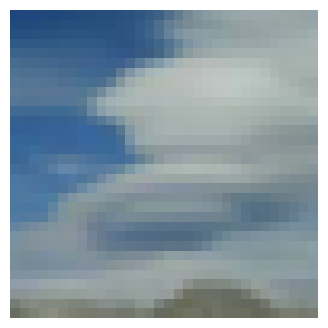

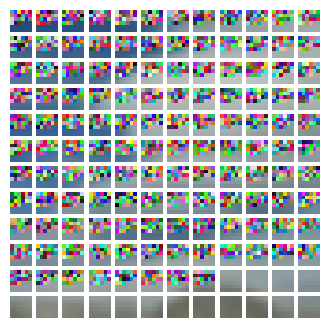

In [10]:
plt.figure(figsize=(4, 4))

# Select a random image and show
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)

# Create patches of the selected image
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

# Show pathes in a nice format
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img).astype("uint8"))
    plt.axis("off")

## Implement the patch encoding layer

The `PatchEncoder` layer will linearly transform a patch by projecting it into a
vector of size `projection_dim`. In addition, it adds a learnable **position
embedding** to the projected vector.

In [11]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

## Build the ViT model

The ViT model consists of multiple Transformer blocks,
which use the `layers.MultiHeadAttention` layer as a self-attention mechanism
applied to the sequence of patches. The Transformer blocks produce a
`[batch_size, num_patches, projection_dim]` tensor, which is processed via a
classifier head with softmax to produce the final class probabilities output.

Unlike the technique described in the [paper](https://arxiv.org/abs/2010.11929),
which prepends a learnable embedding to the sequence of encoded patches to serve
as the image representation, all the outputs of the final Transformer block are
reshaped with `layers.Flatten()` and used as the image
representation input to the classifier head.
Note that the `layers.GlobalAveragePooling1D` layer
could also be used instead to aggregate the outputs of the Transformer block,
especially when the number of patches and the projection dimensions are large.

In [12]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data
    augmented = data_augmentation(inputs)
    # Create patches
    patches = Patches(patch_size)(augmented)
    # Encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


## Compile, train, and evaluate the model <font color="#007799">*(Switch to GPU runtime if needed)*</font>

In [13]:
# Create ViT model
model = create_vit_classifier()

In [14]:
# Compile model
optimizer = keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)

model.compile(optimizer=optimizer,
                       loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                                keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),]
                       )

checkpoint_filepath = "/tmp/checkpoint.weights.h5"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

In [15]:
# Train model

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
    callbacks=[checkpoint_callback],
)

176/176 ━━━━━━━━━━━━━━━━━━━━ 99s 388ms/step - accuracy: 0.0276 - loss: 4.9169 - top-5-accuracy: 0.1113 - val_accuracy: 0.1116 - val_loss: 3.8788 - val_top-5-accuracy: 0.3186


In [17]:
# Load model weights
model.load_weights(checkpoint_filepath)

# Evaluate model performance
_, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)

print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1160 - loss: 3.8431 - top-5-accuracy: 0.3295
Test accuracy: 11.58%
Test top 5 accuracy: 32.84%


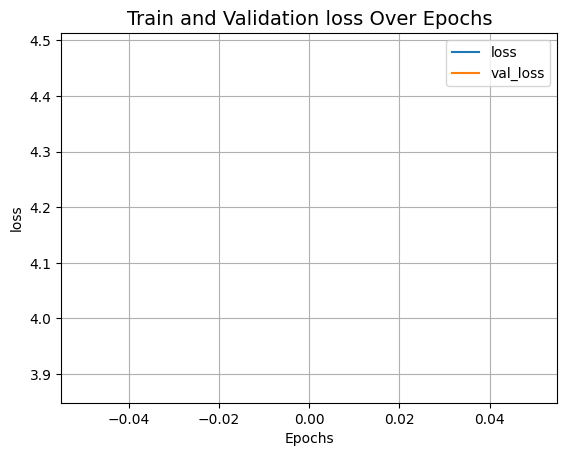

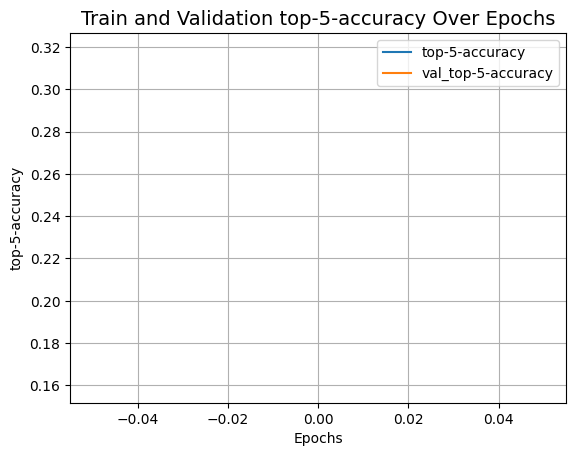

In [18]:
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

plot_history("loss")
plot_history("top-5-accuracy")

## Inference on test data

In [19]:
# Test data
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [20]:
# Prediction for 1st test sample
pred = model(x_test[0].reshape(-1, 32, 32, 3))
pred.shape

TensorShape([1, 100])

In [ ]:
# Predicted index for 1st test sample
idx = np.argmax(pred, axis=1)[0]
idx

12

In [ ]:
# Class labels to map the model output

class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
                'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
                'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
                'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
                'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
                'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
                'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
                'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
                'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

len(class_labels)

100

In [ ]:
# Predicted label for 1st test sample
pred_label = class_labels[idx]
pred_label

'bridge'

In [ ]:
# Actual label for 1st test sample
actual_label = class_labels[y_test[0][0]]
actual_label

'mountain'

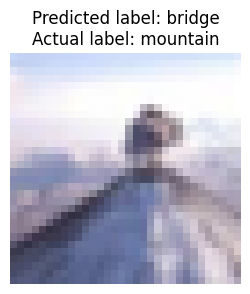

In [ ]:
# Visualize image, pred_label, actual_label for 1st test sample

plt.figure(figsize=(3, 3))
image = x_test[0]
plt.imshow(image.astype("uint8"))
plt.title(f"Predicted label: {pred_label}\nActual label: {actual_label}")
plt.axis("off")
plt.show()

In [ ]:
# Create a function to do prediction for test data

def prediction_on_test_data(test_idx):
    pred = model(x_test[test_idx].reshape(-1, 32, 32, 3))
    idx = np.argmax(pred, axis=1)[0]

    pred_label = class_labels[idx]
    actual_label = class_labels[y_test[test_idx][0]]

    plt.figure(figsize=(3, 3))
    image = x_test[test_idx]
    plt.imshow(image.astype("uint8"))
    plt.title(f"Predicted label: {pred_label}\nActual label: {actual_label}")
    plt.axis("off")
    plt.show()


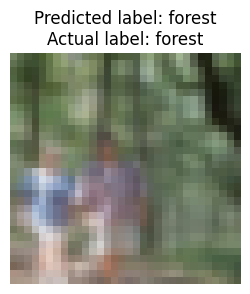

In [ ]:
prediction_on_test_data(test_idx=1)

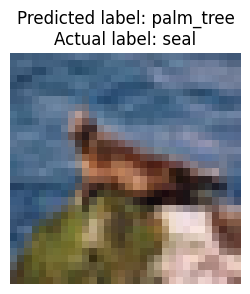

In [ ]:
prediction_on_test_data(test_idx=2)

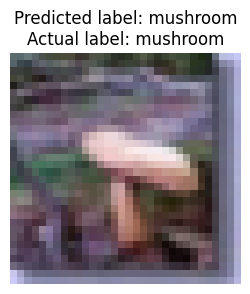

In [ ]:
prediction_on_test_data(test_idx=3)

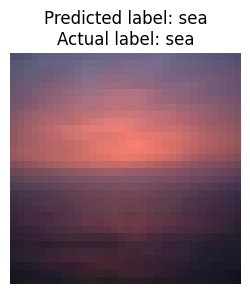

In [ ]:
prediction_on_test_data(test_idx=4)

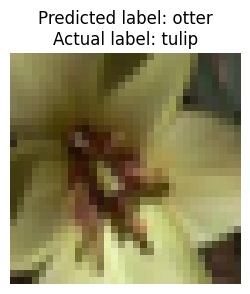

In [ ]:
prediction_on_test_data(test_idx=5)

Here, we have trained it for 10 epochs. We can try to train the model for more epochs since the performance is still improving.

After 100 epochs, the ViT model achieves around 55% accuracy and
82% top-5 accuracy on the test data. These are not competitive results on the CIFAR-100 dataset,
as a ResNet50V2 trained from scratch on the same data can achieve 67% accuracy.

Note that the state of the art results reported in the
[paper](https://arxiv.org/abs/2010.11929) are achieved by pre-training the ViT model using the JFT-300M dataset, then fine-tuning it on the target dataset. **To improve the model quality** without pre-training, you can **try to train the model for more epochs, use a larger number of Transformer layers, resize the input images, change the patch size, or increase the projection dimensions**.
Besides, as mentioned in the paper, the quality of the model is affected not only by architecture choices, but also by parameters such as the learning rate schedule, optimizer, weight decay, etc. In practice, it's recommended to fine-tune a ViT model that was pre-trained using a large, high-resolution dataset.

### Reference:

[Image classification with Vision Transformer with Keras](https://keras.io/examples/vision/image_classification_with_vision_transformer/#image-classification-with-vision-transformer)

### Please answer the questions below to complete the experiment:




In [21]:
#@title Select the False statement w.r.t ViT model: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "The ViT model applies the Transformer architecture with self-attention to sequences of image patches, with using convolution layers" #@param ["", "The ViT model applies the Transformer architecture with self-attention to sequences of image patches, with using convolution layers", "Patch size is one of the hyperparameter that affects the ViT model performance", "The input to the encoder is a sequence of embedded image patches which is also augmented with positional information"]

In [22]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [23]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [25]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [24]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [26]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [27]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7421
Date of submission:  02 Oct 2024
Time of submission:  00:23:44
View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions
